In [5]:
import pandas as pd
import numpy as np

from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [7]:
from nltk import download as nltk_download
nltk_download("stopwords")

[nltk_data] Downloading package stopwords to /home/studio-lab-
[nltk_data]     user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
from pathlib import Path

def load_csv(file_name = None, dir = "Data_csv_0539"):   
    link_path = dir
    q = Path(link_path)
    while not q.exists():
        link_path = "../" + link_path
        q = Path(link_path)
        if len(link_path) > 500: raise Exception(f"Directory {dir} not found.") 
    if not file_name: return list(q.glob('*.csv'))
    f = q / file_name
    if not f.exists():
        raise Exception("File not found.")    
    file_csv = f.resolve()
    return file_csv

In [9]:
from pathlib import Path
import sys

def load_pexplorer():   
    link_path = "pexplorer"
    q = Path(link_path)
    while not q.exists():
        link_path = "../" + link_path
        q = Path(link_path)
        if len(link_path) > 500: raise Exception("Directory pexplorer not found.") 
    sys.path.append(link_path)
    import pexplorer as px
    return px

px = load_pexplorer()

In [10]:
df_path = load_csv("taylor_swift_lyrics.csv")

In [11]:
df = pd.read_csv(df_path, low_memory=False, encoding = "latin1")

In [12]:
df.head()

,artist,album,track_title,track_n,lyric,line,year
0,Taylor Swift,Taylor Swift,Tim McGraw,1,He said the way my blue eyes shined,1,2006
1,Taylor Swift,Taylor Swift,Tim McGraw,1,Put those Georgia stars to shame that night,2,2006
2,Taylor Swift,Taylor Swift,Tim McGraw,1,"I said, ""That's a lie""",3,2006
3,Taylor Swift,Taylor Swift,Tim McGraw,1,Just a boy in a Chevy truck,4,2006
4,Taylor Swift,Taylor Swift,Tim McGraw,1,That had a tendency of gettin' stuck,5,2006


In [40]:
px.check_df(df)

,col. name,type,unique,NAN(%),min,max,mean,std,25%,50%,75%,binary values
Num.,,,,,,,,,,,,
1),artist,object,1,0.000000,-,-,-,-,-,-,-,-
2),album,object,6,0.000000,-,-,-,-,-,-,-,-
3),track_title,object,94,0.000000,-,-,-,-,-,-,-,-
4),track_n,int64,19,0.000000,1,19,8.216989,4.696379,4.000000,8.000000,12.000000,-
5),lyric,object,3155,0.000000,-,-,-,-,-,-,-,-
6),line,int64,101,0.000000,1,101,28.426573,18.343649,13.000000,26.000000,41.000000,-
7),year,int64,6,0.000000,2006,2017,2011.882764,3.571447,2010.000000,2012.000000,2014.000000,-


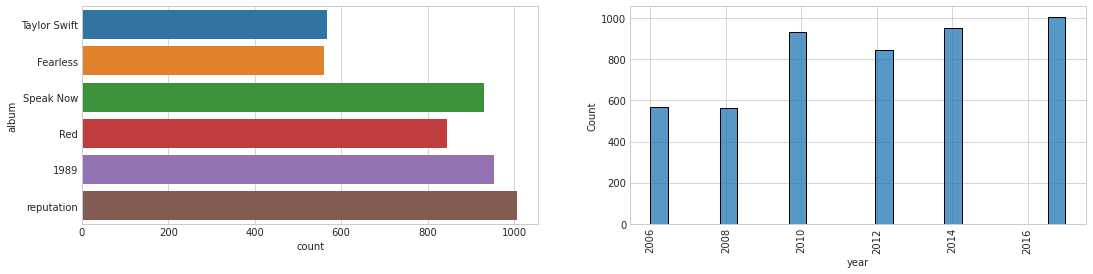

In [42]:
px.plot_numcat(df, "year", "album")

In [43]:
px.glimpse(df)

Rows: 4,862
Columns: 7


,dtype,sample values
artist,object,[Taylor Swift]
album,object,"[Taylor Swift, Fearless, Speak Now, Red, 1989,..."
track_title,object,"[Tim McGraw, Picture To Burn, Teardrops On My ..."
track_n,int64,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]"
lyric,object,"[He said the way my blue eyes shined, Put thos..."
line,int64,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]"
year,int64,"[2006, 2008, 2010, 2012, 2014, 2017]"


In [45]:
df = px.make_cat(df)

Las columnas convertidas:             
-------------------------
artist (1)
album (6)
track_title (94)



In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4862 entries, 0 to 4861
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   artist       4862 non-null   category
 1   album        4862 non-null   category
 2   track_title  4862 non-null   category
 3   track_n      4862 non-null   int64   
 4   lyric        4862 non-null   object  
 5   line         4862 non-null   int64   
 6   year         4862 non-null   int64   
dtypes: category(3), int64(3), object(1)
memory usage: 169.4+ KB


In [59]:
df_tracks = df.track_title.value_counts().to_frame().rename(columns={"track_title": "Count lines"})

In [61]:
df_tracks.head(20)

,Count lines
End Game (Ft. Ed Sheeran & Future),101
I Wish You Would,83
Blank Space,83
Enchanted,80
Delicate,78
Getaway Car,78
So It Goes...,74
Look What You Made Me Do,73
Call It What You Want,73
Shake It Off,72


In [13]:
def get_lyrics(song):
    df_song = px.any_value(df, song)
    if len(df_song) == 0:
        return "No existe esa canción"
    else:
        lines = ""
        filtered_list = []
        
        for i in df_song.lyric:
            cl_text = str(i)
            lines += " " + cl_text.lower()
            
        tokenizer = RegexpTokenizer(r'\w+')
        w_tk = tokenizer.tokenize(lines)
        stop_words = set(stopwords.words("english"))
        
        for word in w_tk:
            if word.casefold() not in stop_words:
                filtered_list.append(word)
        
        return lines, filtered_list

In [14]:
lyrcs, words = get_lyrics("Delicate")

In [34]:
df_song = pd.DataFrame(np.array(words))\
        .value_counts()\
        .to_frame()\
        .rename(columns={0: "count"})\
        .reset_index()\
        .rename(columns={0: "word"})

In [36]:
df_song

,word,count
0,delicate,15
1,cause,12
2,know,8
3,like,8
4,cool,8
...,...,...
69,mine,1
70,dark,1
71,night,1
72,nightstand,1


In [16]:
import scattertext as st

In [17]:
import spacy
from spacy import displacy
from spacy.util import minibatch, compounding
import spacy #load spacy
nlp = spacy.load("en_core_web_trf")

In [50]:
df_song['parsed'] = df_song.word.apply(nlp)

In [51]:
df_song

,word,count,parsed
0,delicate,15,(delicate)
1,cause,12,(cause)
2,know,8,(know)
3,like,8,(like)
4,cool,8,(cool)
...,...,...,...
69,mine,1,(mine)
70,dark,1,(dark)
71,night,1,(night)
72,nightstand,1,(nightstand)
